# Measuring Similarity of Multidimensional Data

</br>
</br>

### Multidimensional Data

</br>

![MultidimData](multidimdata.jpg)

Dimensions can be encoded as spatial or visual elements, such as along x and y axes or by color, size or symbol.

</br>
</br>
</br>

<img src="tableMultiDim.png" alt="Table" width="500"/>

</br>
</br>

* How do we measure similarity of multidimensional data?

</br>
</br>
</br>

### A Toy Example

Imagine that you have a data set consisting of the *heights* and *weights* of hundreds of people, and that you are trying to identify **groups of people** having **similar** body sizes.

* You could *separately* measure how *similar* their height and weight are, but how do you *combine* the results?

* It sounds more reasonable to treat (height, weight) pairs as **points** in two-dimensions and estimate similarity based on **Euclidean distance**.

In [1]:
#  Consider the following toy dataframe
import pandas as pd

df = pd.DataFrame( {'Person':['A','B','C'], 'Height (inches)':[63,67,70], 
      'Height (centimeters)':[160,170.2,177.8], 'Weight (pounds)':[150,160,171] })

df

Person  Height (inches)  Height (centimeters)  Weight (pounds)
0      A               63                 160.0              150
1      B               67                 170.2              160
2      C               70                 177.8              171

<img src="toy.jpg" alt="Formula" width="250"/>

</br>
</br>
</br>

<img src="distanceFormula.png" alt="Formula" width="400"/>

In [2]:
# we need the math library to use the sqrt function
import math 

def distance (v, w):
    tot_sum = 0
    for v_i, w_i in zip(v,w):
        tot_sum += ( v_i - w_i )**2 
        
    return math.sqrt( tot_sum )


In [3]:
# ** NOTE **
#
# zip(iterator1, iterator2, iterator3 ...) 
#
# The zip() function returns a zip object, which is an iterator of tuples 
# where the first item in each passed iterator is paired together, and then 
# the second item in each passed iterator are paired together etc.
#
# If the passed iterables have different lengths, the iterable with 
# the least items decides the length of the new iterator. 
#
# ** NOTE **


a = [1, 2, 3]
b = [1, 2, 3]

for e in zip(a,b):
    print(e)
    
print()
    
# ** NOTE **
#
# List Comprehension
#   List comprehension offers a shorter syntax when you want to create 
#   a new list based on the values of an existing list
#
#
# ** NOTE **
    
ab = [ [a_i,b_i] for a_i, b_i in zip(a,b) ]

print(ab)

(1, 1)
(2, 2)
(3, 3)

[[1, 1], [2, 2], [3, 3]]


In [4]:
# We compute the distance between each pair of points

# inches
Ai = [ df['Height (inches)'][0], df['Weight (pounds)'][0] ]
Bi = [ df['Height (inches)'][1], df['Weight (pounds)'][1] ] 
Ci = [ df['Height (inches)'][2], df['Weight (pounds)'][2] ]

# centimeters
Ac = [ df['Height (centimeters)'][0], df['Weight (pounds)'][0] ]
Bc = [ df['Height (centimeters)'][1], df['Weight (pounds)'][1] ] 
Cc = [ df['Height (centimeters)'][2], df['Weight (pounds)'][2] ]

print(f"AB: {distance(Ai,Bi):.2f} [using in]; {distance(Ac,Bc):.2f} [using cm]")
print(f"AC: {distance(Ai,Ci):.2f} [using in]; {distance(Ac,Cc):.2f} [using cm]")
print(f"BC: {distance(Bi,Ci):.2f} [using in]; {distance(Bc,Cc):.2f} [using cm]")


AB: 10.77 [using in]; 14.28 [using cm]
AC: 22.14 [using in]; 27.53 [using cm]
BC: 11.40 [using in]; 13.37 [using cm]


### Which is the closest pair of points?

</br>

#### **Problem:** 

* if we use inches, B is more similar to A

* if we use centimeters, B is more similar to C

# Rescaling

Many techniques are sensitive to the ***scale*** of your data (*data range*).

We need to obtain a measure that does **not** depend on the unit measure.

## **Standardizing**

A possibility to make different dimensions comparable with one another, is to rescale them in such a way that we consider the **relative** value, rather than the **absolute** value.

We can use **standardization**: we rescale our data so that each dimension has **mean 0** and **standard deviation 1**. 

   * This effectively gets rid of the units, converting each dimension to “*standard deviations from the mean*”.
   
   * Two height/weights will be similar if they are *equally likely* (under the assumption that the data are normally distributed)

   * This value is known as standard score and is most commonly called **z-scores**.

#### **Z-score**

We compute the standardized value $z_i$ of a data point $x_i$ as follow:

$$z_i = \frac{x_i - \mu(x)}{\sigma(x)}$$

Where,

$z_i$: ith standardized value,

$x$: all values,

$\mu(x)$: the mean value of all x values

$\sigma(x)$: the standard deviation of the x values

In [5]:
# Calculate the standard deviation of the two columns

df[['Height (inches)', 'Height (centimeters)']].std()

Height (inches)         3.511885
Height (centimeters)    8.931592
dtype: float64

In [6]:
# Calculate the means of the two columns.

df[['Height (inches)', 'Height (centimeters)']].mean()

Height (inches)          66.666667
Height (centimeters)    169.333333
dtype: float64

In [7]:
df['z_inches'] = ( df['Height (inches)'] - df['Height (inches)'].mean()) / df['Height (inches)'].std()
df['z_cm'] = ( df['Height (centimeters)'] - df['Height (centimeters)'].mean()) / df['Height (centimeters)'].std()

df.head()

Person  Height (inches)  Height (centimeters)  Weight (pounds)  z_inches  \
0      A               63                 160.0              150 -1.044074   
1      B               67                 170.2              160  0.094916   
2      C               70                 177.8              171  0.949158   

       z_cm  
0 -1.044980  
1  0.097034  
2  0.947946

* **Q1:** Does the scale of the data affect the results?

* **Q2:** What is now the closest pair of points?

In [8]:
# inches
Ai = [ df['z_inches'][0], df['Weight (pounds)'][0] ]
Bi = [ df['z_inches'][1], df['Weight (pounds)'][1] ] 
Ci = [ df['z_inches'][2], df['Weight (pounds)'][2] ]

# centimeters
Ac = [ df['z_cm'][0], df['Weight (pounds)'][0] ]
Bc = [ df['z_cm'][1], df['Weight (pounds)'][1] ] 
Cc = [ df['z_cm'][2], df['Weight (pounds)'][2] ]

print(f"AB: {distance(Ai,Bi):.2f} - {distance(Ac,Bc):.2f}")
print(f"AC: {distance(Ai,Ci):.2f} - {distance(Ac,Cc):.2f}")
print(f"BC: {distance(Bi,Ci):.2f} - {distance(Bc,Cc):.2f}")

AB: 10.06 - 10.06
AC: 21.09 - 21.09
BC: 11.03 - 11.03


So far so good, but we only solved the issue of having to choose between two scales for the height.

We have to **standardized all features**, i.e., apply the same procedure to the **Weight** column.


### **Exercise**

* Standardize the 'Weight (pounds)' column

* Compute all distances again to find the closest pair of points

* Discuss the results

In [9]:
# Standardize the 'Weight (pounds)' column

df['z_pounds'] = ( df['Weight (pounds)'] - df['Weight (pounds)'].mean()) / df['Weight (pounds)'].std()
df


Person  Height (inches)  Height (centimeters)  Weight (pounds)  z_inches  \
0      A               63                 160.0              150 -1.044074   
1      B               67                 170.2              160  0.094916   
2      C               70                 177.8              171  0.949158   

       z_cm  z_pounds  
0 -1.044980 -0.983755  
1  0.097034 -0.031734  
2  0.947946  1.015489

In [10]:
# Compute all distances again to find the closest pair of points

A_z = [ df['z_cm'][0], df['z_pounds'][0] ]
B_z = [ df['z_cm'][1], df['z_pounds'][1] ] 
C_z = [ df['z_cm'][2], df['z_pounds'][2] ]

print(f"AB standardized: {distance(A_z,B_z):.2f}")
print(f"AC standardized: {distance(A_z,C_z):.2f}")
print(f"BC standardized: {distance(B_z,C_z):.2f}")

AB standardized: 1.49
AC standardized: 2.82
BC standardized: 1.35


In [11]:
# What is now the closest pair of points?
# What was the closest pair of points before the standardization of the  'Weight (pounds)' column?

## Measuring "angular" similarity 

What we just did is measuring similarity based on the distance on some *metric space*.

We used the *Euclidean* distance, but it is often preferable to use a metric called ***cosine similarity***, defined as the cosine of the angle between users' interest vectors.

Formally:

$cosine\_similarity$ ($A,B$) = $\cos(\theta) = \frac{A \cdot B}{\| A \| \| B \|}$

where: 

$A \cdot B$ is the dot product

* $A \cdot B = a_1b_1 + a_2b_2 + ... + a_nb_n = \sum^{n}_{i=1} a_ib_i$

$\| A \|$ is the Euclidean norm or magnitude of $A$

* $\| A \| = \sqrt{a^2_1 + a^2_2 + ... + a^2_n} $

</br>

![](cosine-similarity-vectors.original.jpg)
</br>

With respect to Euclidean distance:
* the magnitude of the vectors is irrelevant (i.e., we do not have to normalize the vectors)

* it naturally provides a bounded similarity score between -1 and +1

* in general, it allows to consider:

    * ***unrelated*** orthogonal vectors having 0 similarity (e.g., users with no common interests)
    
    * ***opposite*** vectors having negative similarity (e.g., when a user *dislikes* what another user likes)

</br>
</br>
<img src="cosSim.jpg" alt="Formula" width="500"/>
</br>

In [12]:
# We can compute the cosine similarity between two vectors as follows:

import math

def dot(a, b):
    return sum(a_i * b_i for a_i, b_i in zip(a, b))

def cosine_similarity(a, b):
    return dot(a, b) / math.sqrt(dot(a, a) * dot(b, b))


## Measuring pairwise similarities

We turn the dataframe into a numpy array and we compute the similarity matrix, whose $(i,j)$ element is the similarity between users $i$ and $j$.

In [13]:
w = df['Weight (pounds)']
df['z_pounds'] = (w - w.mean()) / w.std()
df[['z_inches','z_pounds']]

z_inches  z_pounds
0 -1.044074 -0.983755
1  0.094916 -0.031734
2  0.949158  1.015489

In [14]:
# We create an array of points

people_array = df[['z_inches','z_pounds']].to_numpy()
people_array

array([[-1.0440738 , -0.98375526],
       [ 0.0949158 , -0.03173404],
       [ 0.949158  ,  1.01548931]])

In [15]:
# We compute the similarity between each pair

import seaborn as sns
from sklearn.metrics import pairwise_distances

sim_mat = pairwise_distances(people_array, metric=cosine_similarity)

sim_mat

array([[ 1.        , -0.47281219, -0.99798543],
       [-0.47281219,  1.        ,  0.41595551],
       [-0.99798543,  0.41595551,  1.        ]])

<AxesSubplot:>

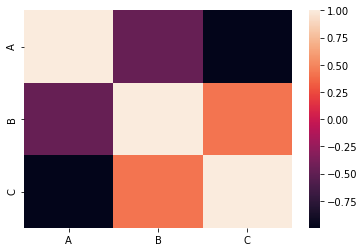

In [16]:
sns.heatmap(sim_mat, xticklabels=['A','B','C'], yticklabels=['A','B','C'])

### **Exercise**

* Consider the following dataset in which for each customer we have the number of units bought of each product

In [17]:
prod = pd.DataFrame( {'Customer':['A','B','C','D'], 'Apple':[0,2,10,3], 'Orange':[10,0,4,3], 
                    'Peach':[1,5,0,8], 'Coconut':[20,0,0,1], 'Grape':[0,5,3,20]})

prod

Customer  Apple  Orange  Peach  Coconut  Grape
0        A      0      10      1       20      0
1        B      2       0      5        0      5
2        C     10       4      0        0      3
3        D      3       3      8        1     20

* Measure the cosine similarity between each pair of customers and plot the similarity matrix

In [18]:
products_array = prod[['Apple','Orange', 'Peach', 'Coconut', 'Grape']].to_numpy()
products_array

array([[ 0, 10,  1, 20,  0],
       [ 2,  0,  5,  0,  5],
       [10,  4,  0,  0,  3],
       [ 3,  3,  8,  1, 20]])

In [19]:
sim_mat = pairwise_distances( products_array , metric = cosine_similarity)
sim_mat

array([[1.        , 0.03039865, 0.15984024, 0.11790591],
       [0.03039865, 1.        , 0.42600643, 0.9040291 ],
       [0.15984024, 0.42600643, 1.        , 0.41511803],
       [0.11790591, 0.9040291 , 0.41511803, 1.        ]])

<AxesSubplot:>

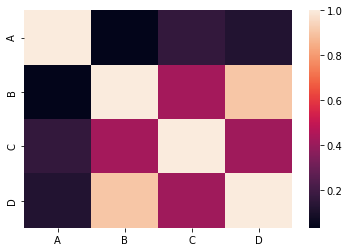

In [20]:
sns.heatmap( sim_mat, xticklabels=['A','B','C','D'], yticklabels=['A','B','C','D'])

________________________________________
________________________________________

# Spatial clustering

We have seen how to compute the **similarity** between any two objects that can be represented as vectors in a suitable vector space.

We used the **distance** between the vectors as a proxy for the (dis)similarity of the two objects.

The same idea can be used to answer the following question:

* **Q:** How can we group the data in homogeneous clusters?


## **K-means**

* K-means is an ***unsupervised*** machine learning ***clustering*** algorithm.

  1. **Input:** unlabeled data.

      * We do not have a set of labeled data that we can use for making predictions about new, unlabeled data. 

  2. **Output:** unlabeled clusters. 
  
      * The clusters won’t label themselves, you’ll have to do that by looking at the data.

#### How the algorithm works

* The k-means algorithm searches for a **predetermined number of clusters** within an unlabeled multidimensional dataset.

   * The number of clusters $k$ is chosen in advance (user input);
   
   * The goal is to partition the inputs into $k$ sets $S_1$, ..., $S_k$, **minimizing the total sum of squared distances** from each point to the center of its assigned cluster;

   * The “*cluster center*” is the arithmetic **mean** of all the points belonging to the cluster.

#### The algorithm applies the following procedure

1. Start with a set of $k$ means $m_1^0,\ldots,m_k^0$ (cluster centers), which are points in the same vector space where the data points live
    - $m_1^0,\ldots,m_k^0$ can be chosen to be $k$ points from the dataset
    - $m_1^0,\ldots,m_k^0$ can be chosen at random or according to some smarter initialization strategy


2. Repeat the following two steps as long as at least one point assignment changes:
    - **assignment**: for each point $x$ in the dataset, assign $x$ to the cluster with the nearest mean, i.e., to the cluster $i=\arg\min_j d(x,m_j^0)$;
    - **update**: for each cluster $i=1,\ldots,k$, update the value of $m_i$ as the mean of the data points in cluster $i$.
    
3. When the assignments no longer change, stop and return the clusters.

![](kmeans.gif)

Let us apply k-means to a synthetic dataset of customers.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster
%matplotlib inline

# We load the dataset 

df = pd.read_csv("customer.csv")
df.head()

age  salary
0   37   47180
1   22   35545
2   47   33381
3   32   26099
4   27   32159

Text(0, 0.5, 'Age')

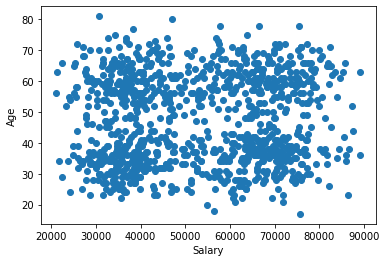

In [22]:
# We plot the data

plt.scatter(df['salary'], df['age'])

plt.xlabel('Salary') # Add an x-label to the axes.
plt.ylabel('Age') # Add a y-label to the axes.


* **Q1:** How do we chose the value of $k$?

In this case we can set $k=4$ by looking at the plot. We will see later on how we can adjust this parameter.

In [23]:
# We standardize the columns

df['z_salary'] = (df['salary'] - df['salary'].mean())/df['salary'].std()
df['z_age'] = (df['age'] - df['age'].mean())/df['age'].std()

df.head()

age  salary  z_salary     z_age
0   37   47180 -0.339615 -0.734964
1   22   35545 -1.036505 -1.787216
2   47   33381 -1.166120 -0.033462
3   32   26099 -1.602283 -1.085715
4   27   32159 -1.239313 -1.436466

### Questions:

* Why do we standardize columns?

* What does it mean to standardize a column?

In [24]:
# We run k-means clustering with 4 clusters.

model = cluster.KMeans(n_clusters=4, random_state=10)
# if you get an error, try to upgrade threadpoolctl with "pip install --upgrade threadpoolctl"

# ** NOTE **
#
#  n_clusters: int, default=8
#
#     The number of clusters to form as well as the number of centroids to generate
#
#  random_state: int, RandomState instance or None, default=None
#
#     Determines random number generation for centroid initialization. 
#     Use an int to make the randomness deterministic.
#
# ** NOTE **

model.fit(df[['z_salary','z_age']])

# ** NOTE **
#
#  fit()
#
#     Compute k-means clustering.
#
# ** NOTE **


# We create a column called cluster that contains 
# the label of the cluster to which each data point belongs.

df['cluster'] = model.labels_

# ** NOTE **
#
#  labels_ : ndarray of shape (n_samples,)
#    Labels of each point 
#
# ** NOTE **

df.sample(5)


age  salary  z_salary     z_age  cluster
303   61   66374  0.810030  0.948641        0
713   41   68168  0.917483 -0.454363        3
596   37   73455  1.234153 -0.734964        3
417   56   53010  0.009579  0.597890        2
109   29   39241 -0.815129 -1.296165        1

Text(0, 0.5, 'Age')

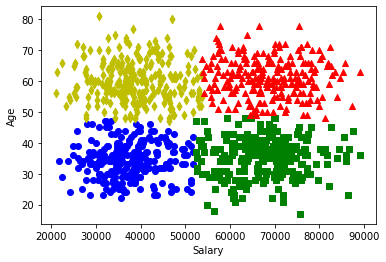

In [25]:
# We plot the clusters.

colors = ['r', 'b', 'y', 'g']
markers = ['^', 'o', 'd', 's']

# we plot each cluster separately, so that we can specify the color and marker
for c in df['cluster'].unique():
    d =  df[ df['cluster'] == c ]
    plt.scatter(d['salary'], d['age'], marker=markers[c], color=colors[c])

plt.xlabel('Salary')
plt.ylabel('Age')

### We can plot the cluster centers as well

In [26]:
centroids = model.cluster_centers_
print(centroids)

centroids_x = centroids[:,0]*df['salary'].std() + df['salary'].mean()
centroids_y = centroids[:,1]*df['age'].std() + df['age'].mean()

[[ 0.94741535  0.96986297]
 [-0.92785041 -0.90524973]
 [-0.84306561  0.87428186]
 [ 0.86335955 -0.85042479]]


Text(0, 0.5, 'Age')

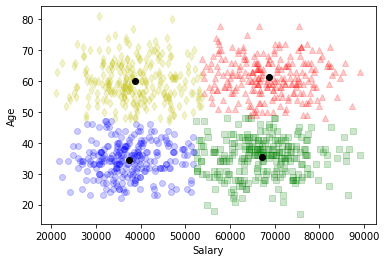

In [27]:
# we plot each cluster separately, so that we can specify the color and marker
for c in df['cluster'].unique():
    d =  df[ df['cluster'] == c ]
    plt.scatter(d['salary'], d['age'], marker=markers[c], color=colors[c], alpha=0.2)
    
# *** NOTE ***
#
# The alpha parameter is used to control the opacity
#
# *** NOTE ***

plt.scatter(centroids_x, centroids_y, color="black")
plt.xlabel('Salary')
plt.ylabel('Age')

In [28]:
model.predict(df[['z_salary','z_age']])[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)


## Setting the number of clusters

**Q1:** How do we choose $k$?

* The Elbow Method

  * We plot the **sum of squared errors** (between each point and the mean of its cluster) as a function of k and we look at where the graph “bends” (this is visible as an elbow). 
  
  * Or the **sum of square distances** between the centroids and each points.
  

* The Silhouette Method

  * The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

#### **The Elbow Method**

In [29]:
import math 

cols = ['z_salary','z_age']


def squared_distance (v, w):
    return sum([ (v_i-w_i)**2 for v_i, w_i in zip(v,w) ])

# we still have to manually set a range for k
k_val = list(range(1,10))
sse = []

In [30]:
# ** NOTE **
#
#  cluster_centers_ : ndarray of shape (n_clusters, n_features)
#    Coordinates of cluster centers. 
#    The outuput is an array of points.
#
#  predict(X):
#    Predict the closest cluster each sample in X belongs to.
#    The output is an array with the number of the cluster to which
#    each point in X belongs.
#
# ** NOTE **


for k in k_val:
    kmeans = cluster.KMeans(n_clusters=k, random_state=10).fit(df[cols])
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(df[cols])
    k_sse = 0

    for i in range(df.shape[0]):
        # for each point in my dataset compute the square distance
        # from the centroid
        center = centroids[pred_clusters[i]]  # centroid coordinates
        point = [ df['z_salary'][i], df['z_age'][i] ] # point coordinates
        k_sse += squared_distance( point, center)

    sse.append(k_sse)


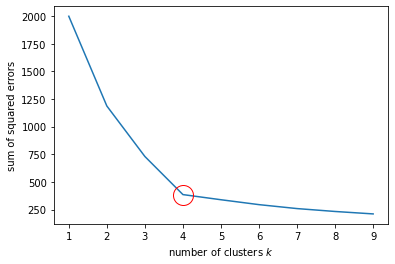

In [31]:
plt.plot( k_val, sse)
plt.ylabel('sum of squared errors')
plt.xlabel('number of clusters $k$')

# I add a small circle to highlight the elbow (you can ignore this line of code)
plt.plot(k_val[3],sse[3],'ro',fillstyle='none',markersize=20)


The Elbow Method suggests that 4 is the 'right' number of clusters, the main bend in the chart is at $k=4$.

### Exercise (difficult)

Try to implement the Silhouette Method defined below, and discuss the results when compared with the Elbow Method.

#### **The Silhouette Method**

* The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

  * The range of the Silhouette value is between +1 and -1. 
  
  * A high value is desirable and indicates that the point is placed in the correct cluster.

  * If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.


The silhouette value of one data point $i \in C_I$ is defined as:

$$s_i = \begin{cases}\frac{b_i-a_i}{\max(a_i,b_i) } &\text{if } |C_I| > 1\\
                     0 &\text{if } |C_I| = 1\end{cases}$$

where 
- $a_i$ is the dissimilarity of point $i$ with the points in its own cluster
- $b_i$ is the dissimilarity of point $i$ with the points in the neighboring cluster
- The similarity is computed as the mean distance from all other points in the cluster

#### **Mean Silhouette Value**

We compute the mean over all points to get a single value for each $k$.

The value $s_i$ can be computed using the function `silhouette_score` included in `sklearn.metrics`

______________________
______________________

# Customer Segmentation: the Recency-Frequency-Monetary (RFM) model


Customer segmentation is the practice of **dividing** a customer base into **groups of individuals** that are similar.
* We can use a number of attributes, such as age, gender, interests and spending habits.

**Recency-Frequency-Monetary (RFM)** analysis is a proven marketing model for behavior based customer segmentation, based on grouping customers based on their transaction history: 
   
   * *How recently* they bought something
   * *How often* they buy
   * *How much* they spend


More precisely, the RFM model combines three different customer attributes to rank customers.

1. **Recency:** time since the customer made his/her most recent purchase.

2. **Frequency:** number of purchases this customer made within a designated time period.

3. **Monetary:** total money spent.

We combine these three scores to create the RFM score, that can be used to segment our customers into different groups.

 


## **Case Study: Online Retail Store**

* Dataset - https://archive.ics.uci.edu/ml/datasets/online+retail

### About the dataset 

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Dataset Description**

* **InvoiceNo:** Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'C', it indicates a cancellation. 
* **StockCode:** Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
* **Description:** Product (item) name. Nominal. 
* **Quantity:** The quantities of each product (item) per transaction. Numeric. 
* **InvoiceDate:** Invice Date and time. Numeric, the day and time when each transaction was generated. 
* **UnitPrice:** Unit price. Numeric, Product price per unit in sterling. 
* **CustomerID:** Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
* **Country:** Country name. Nominal, the name of the country where each customer resides.

*Nominal:* a type of data that is used to label variables without providing any quantitative value.

In [32]:
# We load the dataset

df = pd.read_csv("Online_Retail.csv")
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [33]:
# We check the number of rows and columns

df.shape

(541909, 8)

In [34]:
# We know that if the InvoiceNo code starts with letter 'C', 
# it indicates a cancellation.
#
# We remove all transactions that have been cancelled
#

df = df[ ~df['InvoiceNo'].str.startswith('C') ]

In [35]:
# We have two numeric columns: Quantity and Unit Price.

df[['Quantity','UnitPrice']].describe()

Quantity      UnitPrice
count  532621.000000  532621.000000
mean       10.239972       3.847621
std       159.593551      41.758023
min     -9600.000000  -11062.060000
25%         1.000000       1.250000
50%         3.000000       2.080000
75%        10.000000       4.130000
max     80995.000000   13541.330000

* **Do you notice somenthing strange?**

</br>
</br>

* The *Quantity* and *Unit Price* columns include negative values. 
* Let us try do understand from the description what is the content of these rows.

In [36]:
# the & is the logical elementwise AND; the ~ is the logical elementwise NOT
df[ (df['Quantity'] < 0) & (~df['Description'].isnull()) ]

InvoiceNo StockCode Description  Quantity          InvoiceDate  \
7313      537032     21275           ?       -30  2010-12-03 16:50:00   
13217     537425    84968F       check       -20  2010-12-06 15:35:00   
13218     537426    84968E       check       -35  2010-12-06 15:36:00   
13264     537432    35833G     damages       -43  2010-12-06 16:10:00   
21338     538072     22423      faulty       -13  2010-12-09 14:10:00   
...          ...       ...         ...       ...                  ...   
535333    581210     23395       check       -26  2011-12-07 18:36:00   
535335    581212     22578        lost     -1050  2011-12-07 18:38:00   
535336    581213     22576       check       -30  2011-12-07 18:38:00   
536908    581226     23090     missing      -338  2011-12-08 09:56:00   
538919    581422     23169     smashed      -235  2011-12-08 15:24:00   

        UnitPrice  CustomerID         Country  
7313          0.0         NaN  United Kingdom  
13217         0.0         NaN  United Kingdom  
13218         0.0         NaN  United Kingdom  
13264         0.0         NaN  United Kingdom  
21338         0.0         NaN  United Kingdom  
...           ...         ...             ...  
535333        0.0         NaN  United Kingdom  
535335        0.0         NaN  United Kingdom  
535336        0.0         NaN  United Kingdom  
536908        0.0         NaN  United Kingdom  
538919        0.0         NaN  United Kingdom  

[474 rows x 8 columns]

In [37]:
df[ (df['UnitPrice'] < 0) & (~df['Description'].isnull()) ]

InvoiceNo StockCode      Description  Quantity          InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1  2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06         NaN  United Kingdom  
299984  -11062.06         NaN  United Kingdom

It seems that the dataset includes lost, damaged and returned items, as well as rows that do not refer to an actual transaction.
* We are interested in transactions that describe customer purchases.
* We can remove these rows.

In [38]:
# We remove the transactions with a negative Quantity

df = df[ ~(df['Quantity']<0) ]

# We remove the transactions with a negative Unit Price

df = df[ ~(df['UnitPrice']<0) ]

## Data cleaning

As always, we first need a sanity check:
- missing values
- duplicates
- data types
- internal consistency

### Missing values

In [39]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133359
Country             0
dtype: int64

The dataframe contains transaction that miss the CustomerID and/or the Description.

* We want to cluster the customers, so the rows with no CustomerID are useless and we can drop them. 
* We can instead ignore the empty Descriptions (we keep them).

In [40]:
df = df[~df['CustomerID'].isna()]

### Duplicates

In [41]:
df.duplicated().sum()

5192

In [42]:
df = df.drop_duplicates()

# ** NOTE **
#
#  drop_duplicates()
# 
#   Return DataFrame with duplicate rows removed.
#
# ** NOTE **

### Data types

In [43]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [44]:
# We convert the InvoiceDate to DateTime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df = df.astype({'CustomerID': 'int64'})

In [45]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

### Internal consistency

We expect each invoice to have a unique date, let's check the constraint InvoiceNo/InvoiceDate.

In [46]:
df[ df.groupby(["InvoiceNo"])["InvoiceDate"].transform('nunique').gt(1) ].sort_values(by=['InvoiceDate'])

InvoiceNo StockCode                          Description  Quantity  \
2421      536591     21427             SKULLS STORAGE BOX SMALL         1   
2440      536591     20768                  GREEN FERN JOURNAL          1   
2441      536591     22081           RIBBON REEL FLORA + FAUNA          1   
2442      536591     20780            BLACK EAR MUFF HEADPHONES         1   
2443      536591    51014C               FEATHER PEN,COAL BLACK        12   
...          ...       ...                                  ...       ...   
498962    578548     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         2   
498963    578548     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS         2   
498952    578548    84673A                        PINK FLY SWAT         2   
498991    578548     84347  ROTATING SILVER ANGELS T-LIGHT HLDR         3   
498992    578548     22411    JUMBO SHOPPER VINTAGE RED PAISLEY         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
2421   2010-12-01 16:57:00       2.10       14606  United Kingdom  
2440   2010-12-01 16:57:00       2.55       14606  United Kingdom  
2441   2010-12-01 16:57:00       1.65       14606  United Kingdom  
2442   2010-12-01 16:57:00       5.49       14606  United Kingdom  
2443   2010-12-01 16:57:00       0.85       14606  United Kingdom  
...                    ...        ...         ...             ...  
498962 2011-11-24 15:02:00       2.55       17345  United Kingdom  
498963 2011-11-24 15:02:00       7.95       17345  United Kingdom  
498952 2011-11-24 15:02:00       0.65       17345  United Kingdom  
498991 2011-11-24 15:03:00       2.55       17345  United Kingdom  
498992 2011-11-24 15:03:00       2.08       17345  United Kingdom  

[1586 rows x 8 columns]

At a first sight, it seems that the same invoice can contains different dates.

A closer inspection suggests that what actually changes is just the time.

Let us verify.

In [47]:
# We create a new column containing only the date.

df['Date'] = df["InvoiceDate"].dt.date
df['Date'] = pd.to_datetime(df['Date'])

# We check the constraint InvoiceNo/Date

df[ df.groupby(["InvoiceNo"])["Date"].transform('nunique').gt(1) ].sort_values(by=['Date'])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Date]
Index: []

We also check that each InvoiceNo refers to a single CustomerID

In [48]:
# InvoiceNo/CustomerID constraint

df[ df.groupby(["InvoiceNo"])["CustomerID"].transform('nunique').gt(1) ]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Date]
Index: []

## Exercise

Perform an Exploratory Data Analysis of the dataset:
* **Q1:** Top 10 ordering countries (number of orders).
* **Q2:** Number of unique customers.
* **Q3:** Check the constraint StockCode/Description.

</br>

In [49]:
# Top 10 ordering countries

#country = df.groupby(["..."]).agg({'...':'...'})['...'].value_counts()

#tot_country = ...
#percentage = [ (v/tot_country)*100 for v in country.tolist()]

#plt.bar(x=..., height=...)
#plt.tick_params(labelrotation=90)

In [50]:
# Unique Customers

#unique_customers = df['...']....()

#print(f"Number or unique customers: {unique_customers}")

In [51]:
# StockCode/Description constraint

#df[ df.groupby(["..."])["..."].transform('...').gt(1) ].sort_values(by=['...'])

# **RFM Dataframe**

To apply the RFM analysis we need the following information: *Recency*, *Frequency*, *Monetary*.

* **Q**: How do we extranct these information from our dataset?



In [52]:
# 1. We create a new column called 'TotalPrice'

df['TotalPrice'] = df['UnitPrice']*df['Quantity']

# 2. We remove the columns we do not need

df.drop(['StockCode','Description', 'Country', 'UnitPrice', 'Quantity', 'InvoiceDate'], axis=1, inplace=True)

df.head()

InvoiceNo  CustomerID       Date  TotalPrice
0    536365       17850 2010-12-01       15.30
1    536365       17850 2010-12-01       20.34
2    536365       17850 2010-12-01       22.00
3    536365       17850 2010-12-01       20.34
4    536365       17850 2010-12-01       20.34

In [53]:
# We can easily group data by 'InvoiceNo' and get the total for that invoice

df.groupby(['InvoiceNo'], as_index=False).agg({'Date': 'first', 'CustomerID': 'first', 'TotalPrice': 'sum'})

InvoiceNo       Date  CustomerID  TotalPrice
0        536365 2010-12-01       17850      139.12
1        536366 2010-12-01       17850       22.20
2        536367 2010-12-01       13047      278.73
3        536368 2010-12-01       13047       70.05
4        536369 2010-12-01       13047       17.85
...         ...        ...         ...         ...
18531    581583 2011-12-09       13777      124.60
18532    581584 2011-12-09       13777      140.64
18533    581585 2011-12-09       15804      329.05
18534    581586 2011-12-09       13113      339.20
18535    581587 2011-12-09       12680      249.45

[18536 rows x 4 columns]

## **Recency**

**Q**: How many days ago was each customer's last purchase?

* We need to fix a reference date to compute how recent is the most recent transaction of each customer.

* We fix the reference date to a day after the most recent transaction date in the dataset.

In [54]:
# Reference date

refDate = df['Date'].max()
print(refDate)

refDate += pd.Timedelta("1 day")
print(refDate)

2011-12-09 00:00:00
2011-12-10 00:00:00


In [55]:
# We calculate the days difference between the most recent transaction 
# carried out by the customer and the reference date.

df['Recency'] = (refDate - df['Date']).dt.days

dfRFM = df.groupby("CustomerID", as_index=False).agg({'Recency' : 'min'})

dfRFM.head()

CustomerID  Recency
0       12346      326
1       12347        3
2       12348       76
3       12349       19
4       12350      311

## **Frequency**

**Q**: How many purchases did each customer make?

In [56]:
# We count the number of orders made by each customer

#F = df.groupby('CustomerID', as_index=False).agg({'InvoiceNo' : 'nunique'})

F = df.groupby('CustomerID', as_index=False).agg({'InvoiceNo' : 'count'})

F.rename(columns={'InvoiceNo': 'Frequency'}, inplace= True)

F.head()

CustomerID  Frequency
0       12346          1
1       12347        182
2       12348         31
3       12349         73
4       12350         17

In [57]:
# We merge the two dataframe

dfRFM = dfRFM.merge(F)

# ** NOTE **
#
#  merge()
# 
#    Merge DataFrame or named Series objects with a database-style join.
#    A named Series object is treated as a DataFrame with a single named column.
#
# ** NOTE **

dfRFM.head()

CustomerID  Recency  Frequency
0       12346      326          1
1       12347        3        182
2       12348       76         31
3       12349       19         73
4       12350      311         17

## **Monetary**

**Q:** How much did customers spend for their purchases?

In [58]:
# We compute the total amount spent by each customer

M = df.groupby('CustomerID', as_index=False).agg({'TotalPrice' : 'sum'})

M.rename(columns={'TotalPrice': 'Monetary'}, inplace= True)

M.head()

CustomerID  Monetary
0       12346  77183.60
1       12347   4310.00
2       12348   1797.24
3       12349   1757.55
4       12350    334.40

In [59]:
# We merge the two dataframe

dfRFM = dfRFM.merge(M)

dfRFM.head()

CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        3        182   4310.00
2       12348       76         31   1797.24
3       12349       19         73   1757.55
4       12350      311         17    334.40

## K-means clustering

To perform customer segmentation, we apply the k-means clustering algorithm to the RFM dataframe. 

Before applying the algorithm:

* We check for outliers

  * We look for outliers from the data analysis point of view. These are transactions that are valid from the business point of view as they are genuine transaction records. 
  

* We standardize our data







### **Outliers**

An outlier is a point or set of data points that lie away from the rest of the data values of the dataset. 

* An outlier is a data point(s) that appear away from the overall distribution of data values in a datase.

**Q1:** How do we check if our data contain outliers?


<ipython-input-60-989edda0c82b>:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


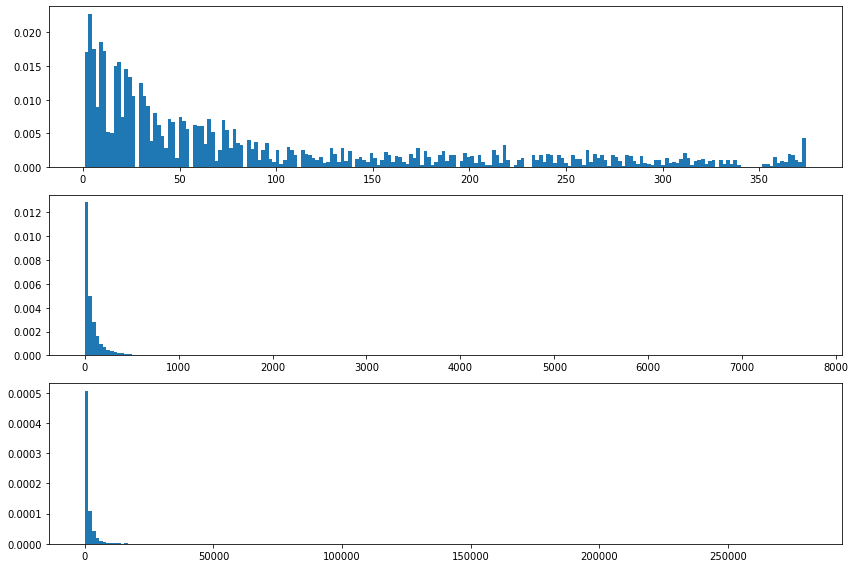

In [60]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

nBins = 200
ax1.hist( dfRFM['Recency'],   nBins,  density=True)
ax2.hist( dfRFM['Frequency'], nBins,  density=True)
ax3.hist( dfRFM['Monetary'],  nBins,  density=True)

fig.tight_layout()
fig.show()

<ipython-input-61-978721c10cf5>:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


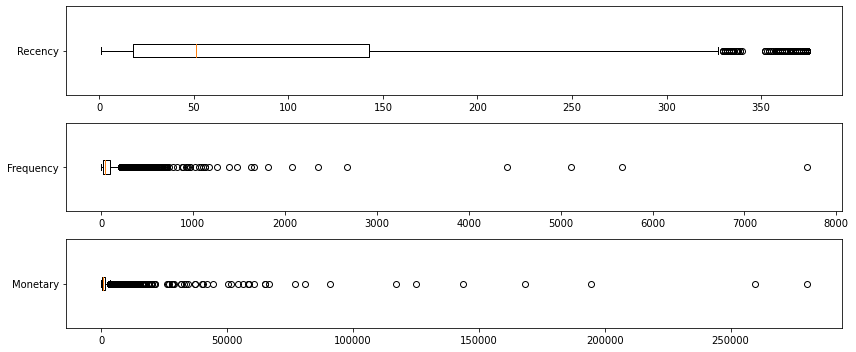

In [61]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 5))

ax1.boxplot( dfRFM['Recency'],    vert=False, labels=['Recency']   )
ax2.boxplot( dfRFM['Frequency'],  vert=False, labels=['Frequency'] )
ax3.boxplot( dfRFM['Monetary'],   vert=False, labels=['Monetary']  )

fig.tight_layout()
fig.show()

We observe for all features that several data points, on the right side of the distribution, are marked as outliers.

* In the box plot all points greater than Q3+1.5*IQR are considered outliers.

**Q2:** How do we treat outliers? 

In this case:

* Recency outliers are not so different from other customers in the tail of the distribution -> We keep them.
* Frequency and Monetary outliers are customers that buy a *lot* more often and spend a *lot* more than all others. We should probably treat them separately (as VIP customers) -> We trim them as well (for the scope of this analysis)



In [62]:
import numpy as np

RFM_col = ['Frequency', 'Monetary']

trRFM = dfRFM.copy()

right_whisker = {}
for c in RFM_col:
    Q1 = trRFM[c].quantile(0.25)
    Q3 = trRFM[c].quantile(0.75)
    IQR = Q3 - Q1
    right_whisker[c] = (Q3+1.5*IQR)
    
trRFM = trRFM[(trRFM['Frequency']<=right_whisker['Frequency'])&(trRFM['Monetary']<=right_whisker['Monetary'])]
trRFM.reset_index(inplace=True, drop=True)

trRFM.head()

CustomerID  Recency  Frequency  Monetary
0       12348       76         31   1797.24
1       12349       19         73   1757.55
2       12350      311         17    334.40
3       12352       37         85   2506.04
4       12353      205          4     89.00

We plot our new dataframe

<ipython-input-63-fcaaafde9c88>:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


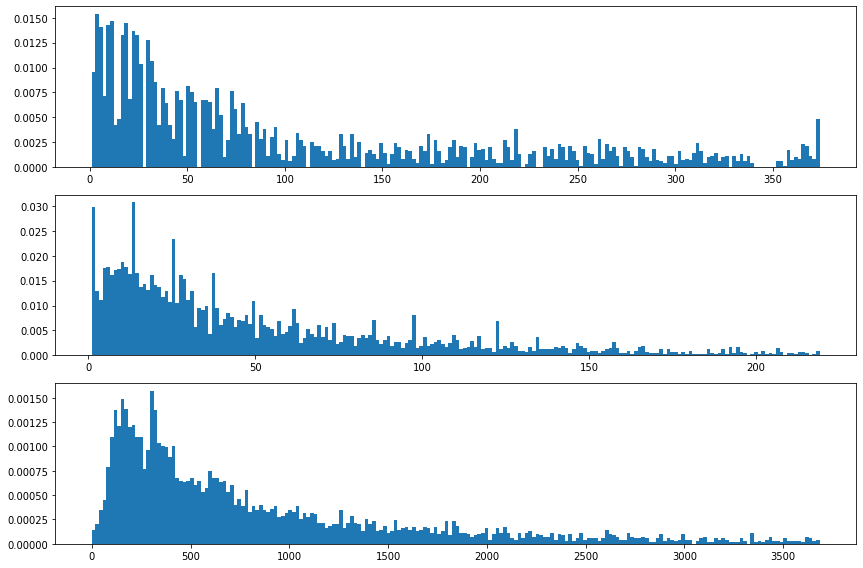

In [63]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(12, 8))

nBins = 200
ax1.hist( trRFM['Recency'],   nBins,  density=True)
ax2.hist( trRFM['Frequency'], nBins,  density=True)
ax3.hist( trRFM['Monetary'],  nBins,  density=True)

fig.tight_layout()
fig.show()

We can even try a 3D plot:

<ipython-input-64-54c024a76f26>:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


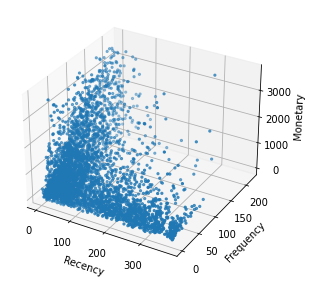

In [64]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.scatter(trRFM['Recency'], trRFM['Frequency'], trRFM['Monetary'], s=5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

fig.tight_layout()
fig.show()

**Q3:** Why is it important to look for outliers?

Spatial clustering algorithms are generally **very sensitive** to outliers and to incomparable scales or magnitudes, especially those, like *k-means* that have a predetermined number of clusters:
- outliers, being far away from the rest, are clustered by their own, pushing all other data points together
- differences in scale make some of the features more relavant when computing distances


### Standardization

In [65]:
trRFM['zR'] = ( trRFM['Recency'] - trRFM['Recency'].mean()) / trRFM['Recency'].std()
trRFM['zF'] = ( trRFM['Frequency'] - trRFM['Frequency'].mean()) / trRFM['Frequency'].std()
trRFM['zM'] = ( trRFM['Monetary'] - trRFM['Monetary'].mean()) / trRFM['Monetary'].std()

trRFM.head()

CustomerID  Recency  Frequency  Monetary        zR        zF        zM
0       12348       76         31   1797.24 -0.267031 -0.400123  1.242209
1       12349       19         73   1757.55 -0.824177  0.502092  1.191319
2       12350      311         17    334.40  2.029971 -0.700861 -0.633457
3       12352       37         85   2506.04 -0.648236  0.759868  2.151039
4       12353      205          4     89.00  0.993876 -0.980118 -0.948111


## **Exercise** (Choice of K)

* Use the **Elbow Method** to choose the number **K** of clusters to create (K-means)


#### **The Elbow Method**

In [66]:
cols = ['zR','zF','zM']

def squared_distance (v, w):
    return sum([ (v_i-w_i)**2 for v_i, w_i in zip(v,w) ])

k_val = list(range(1,10))
sse = []

for k in k_val:
    kmeans = cluster.KMeans(n_clusters=k, random_state=10).fit( trRFM [cols] )
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(trRFM [cols])
    k_sse = 0

    for i in range(trRFM.shape[0]):
        center = centroids[pred_clusters[i]]
        point = [ trRFM['zR'][i], trRFM['zF'][i], trRFM['zM'][i]   ]
        k_sse += squared_distance( point, center)

    sse.append(k_sse)


Text(0.5, 0, 'number of clusters $k$')

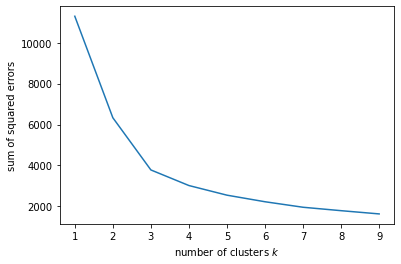

In [67]:
plt.plot( k_val, sse )
plt.ylabel('sum of squared errors')
plt.xlabel('number of clusters $k$')

The Elbow Method suggests that ... is the 'right' number of clusters

## **Exercise** (K-means)

* Apply K-means and create a dataframe with the centroids

In [68]:
kmeans = cluster.KMeans(n_clusters=3, random_state=10).fit( trRFM [['zR','zF','zM']] )


## **Exercise** (Labeling Clusters)

* We de-standardize the center of each cluster, to understand what is the profile of the customers inside each of them.

In [69]:
centroids = kmeans.cluster_centers_

df_centroids = {'Recency':[],'Frequency':[],'Monetary':[], 'Cluster':[]}

for i,c in enumerate(centroids):
    df_centroids['Cluster'].append(i)
    for j,col_name in enumerate(['Recency','Frequency','Monetary']):
        df_centroids[col_name].append( trRFM[col_name].std() * c[j] + trRFM[col_name].mean())
    
dfCentroids = pd.DataFrame(df_centroids)
dfCentroids

Recency   Frequency     Monetary  Cluster
0   53.509755   35.060530   590.747560        0
1  255.892340   21.727743   368.059658        1
2   43.548750  119.711250  1978.264039        2

* Write a label for each cluster and a short description of the cluster.

#### **Three Clusters (Customer Segments):** 

* **High value customer:** Customers in *cluster 0* place orders with the highest value at a very high relative frequency compared to other customers. They are also the ones who placed an order the most recently.

* **Medium value customer:** Customers in *cluster 2* place orders of considerable amount, though not comparable to customers in *cluster 0*. Their orders are relative more frequent than those placed by customers in *cluster 1* and less recent that customers in *cluster 0*. 

* **Low value customer:** Customers in *cluster 1* rarely shop and when they order, their orders are pretty low valued. They placed their last order a long time ago. Customers in this cluster could be at risk.

## **The Silhouette Method**

In [70]:
from sklearn.metrics import silhouette_score

k_val = list(range(2,10))
sil = []

for k in k_val:
    kmeans = cluster.KMeans(n_clusters=k, random_state=10).fit( trRFM [['zR','zF','zM']] )
    labels = kmeans.labels_
    sil.append(silhouette_score(trRFM [['zR','zF','zM']], labels))

Text(0.5, 0, 'number of clusters $k$')

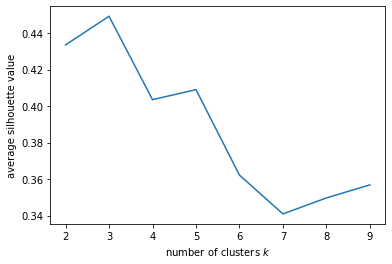

In [71]:
plt.plot( k_val, sil)
plt.ylabel('average silhouette value')
plt.xlabel('number of clusters $k$')

The Silhouette Method suggests that both 3 and 5 could be good choices for k.

In [72]:
kmeans = cluster.KMeans(n_clusters=5, random_state=10).fit( trRFM [['zR','zF','zM']] )
centroids = kmeans.cluster_centers_

df_centroids = {'Recency':[],'Frequency':[],'Monetary':[], 'Cluster':[]}

for i,c in enumerate(centroids):
    df_centroids['Cluster'].append(i)
    for j,col_name in enumerate(['Recency','Frequency','Monetary']):
        df_centroids[col_name].append( trRFM[col_name].std() * c[j] + trRFM[col_name].mean())
    
dfCentroids = pd.DataFrame(df_centroids)
dfCentroids

Recency   Frequency     Monetary  Cluster
0  259.502703   21.120000   357.833362        0
1   51.482270   60.890780  1376.148553        1
2   45.369492  133.064407   895.697763        2
3   57.073072   25.606225   406.629447        3
4   41.226519  130.607735  2631.633925        4

#### **Five Clusters (Customer Segments):** 

* **Top customer:** Customers in *cluster 4* are high value customer who has shopped recently and shops regularly for high value orders.

* **High value customer:** Customers in *cluster 1* place quite high value orders but do not do so frequently or have not done it much recently. 

* **Medium value customer:** Customers in *cluster 2* have recently placed medium valued orders. Consumers in this group have the highest frequency. In the long-term view, some of these consumers might become very highly profitable. 

* **Low value customers:** Customers in *cluster 3* placed low valued orders quite a long time ago and they do not order very frequently.
 
* **Lost Customers:** Customers in *cluster 0* have not shopped in the longest time, nor do they shop frequently and their orders are of the lowest values. The low value of frequency and the high value of recency are signals that these customers are at risk or we have already lost them.

## **Exercise**

* **Q1:** What is the size of each cluster?

* **Q2:** What percentage of the total sales do the customers in the most valuable cluster represent?

  * **Q2.1:** What is the sales percentage of each cluster?
  

  
* **Q3:** How does the result of our analysis change if: we cap our data instead of trimming them, we apply the percentile approach to identify outliers, we keep all outliers without *treating* them? 

# **Clustering (percentiles)**

We can use other methods to cluster our customers, a common approach is to use percentiles.

* RFM analysis involves scoring and ranking customers according to three attributes separately.

* A common approach is to have five grades for each attribute, yielding a total of 125 combinations.

  * We assign a score from one to five to recency, frequency and monetary values individually for each customer. 
  
  * Five is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.
  
    * Customers who purchased recently, are frequent buyers and spend a lot are assigned score of 555 – Recency(R) – 5, Frequency(F) – 5, Monetary(M) – 5. They are your best customers.

    * Customers spending the lowest, making hardly any purchase and that too a long time ago are assigned score of 555. Recency(R) – 1, Frequency(F) – 1, Monetary(M) – 1. 




## **Quintiles**

We use quintiles that are the 20th, 40th, 60th and 80th percentiles, thus dividing the data in 5 equal parts.

</br>

<img src="quitiles.jpg" alt="Table" width="500"/>

</br>

In [73]:
# We compute the RFM score of each customer

dfRFM["R"] = pd.qcut( dfRFM["Recency"],    5,  labels=[5,4,3,2,1] )
dfRFM["F"] = pd.qcut( dfRFM["Frequency"],  5,  labels=[1,2,3,4,5] )
dfRFM["M"] = pd.qcut( dfRFM["Monetary"],   5,  labels=[1,2,3,4,5] )

# ** NOTE **
# 
#  qcut(x, q, labels=None, ...)
#
#    Quantile-based discretization function.
#    Discretize variable into equal-sized buckets based on rank 
#    or based on sample quantiles. 
# 
#    x: 1d ndarray or Series
#
#    q: int or list-like of float
#      Number of quantiles. 10 for deciles, 4 for quartiles, etc. 
#      Alternately array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles.
#
#    labels: array or False, default None
#      Used as labels for the resulting bins. Must be of the same length 
#      as the resulting bins. If False, return only integer indicators of 
#      the bins. If True, raises an error. 
#
# ** NOTE **

dfRFM["RFM_Score"] = dfRFM["R"].astype(str) + dfRFM["F"].astype(str) + dfRFM["M"].astype(str)

dfRFM

CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Score
0          12346      326          1  77183.60  1  1  5       115
1          12347        3        182   4310.00  5  5  5       555
2          12348       76         31   1797.24  2  3  4       234
3          12349       19         73   1757.55  4  4  4       444
4          12350      311         17    334.40  1  2  2       122
...          ...      ...        ...       ... .. .. ..       ...
4334       18280      278         10    180.60  1  1  1       111
4335       18281      181          7     80.82  1  1  1       111
4336       18282        8         12    178.05  5  1  1       511
4337       18283        4        721   2045.53  5  5  4       554
4338       18287       43         70   1837.28  3  4  4       344

[4339 rows x 8 columns]

## **Exercise**

* **Q1:** What is the maximum number of clusters that this method creates?

* **Q2:** How many clusters did we create?

* **Q3:** How many customers do we have inside each cluster?

* **Q4:** Which are the most populated clusters (top10)?

In [74]:
# code goes here!

## **Labeling**

* **Q1:** How do we label our clusters?

We propose the following labeling with 7 clusters. 

* We treat Frequency and Monetary as a single combined value (dimension).

| Label |	Description |	R | F+M |
| --- | --- | --- | --- | 
| Champions | Bought recently, buy often and spend a good amount. | 5 | 9-10 |
| Loyal | Buy often from our store and spend a good amount.<br> Customers who have the most potential to become the Champions. | 3-4 | 8-10 |
| Recent | Bought recently, but not often or for a small amount amount. | 4<br>5 | 2-7<br>2-8 |
| Needing Attention | Above average recency or frequency or monetary values.  |2<br>3 |8-10<br>2-7 |
| About to sleep | Below average recency, frequency and monetary value. | 2| 2-7 |
| Can't lose them| Made big purchases, and often. They have not returned for a long time.|1| 8-10 |
|Hibernating|Last purchase was long back, low spenders and low number of orders|1|2-7|

In [75]:
# We apply our labels to our dataset

dfRFM['Label'] = [np.nan]*dfRFM.shape[0]

dfRFM.loc[ (dfRFM['R'].astype(int) == 5) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) >= 9 ), 'Label'] = "Champions"

dfRFM.loc[ (dfRFM['R'].astype(int) == 4) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) >= 8 ), 'Label'] = "Loyal"
dfRFM.loc[ (dfRFM['R'].astype(int) == 3) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) >= 8 ), 'Label'] = "Loyal"

dfRFM.loc[ (dfRFM['R'].astype(int) == 5) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) <= 8 ), 'Label'] = "Recent"
dfRFM.loc[ (dfRFM['R'].astype(int) == 4) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) <= 7 ), 'Label'] = "Recent"

dfRFM.loc[ (dfRFM['R'].astype(int) == 2) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) >= 8 ), 'Label'] = "Needing Attention"
dfRFM.loc[ (dfRFM['R'].astype(int) == 3) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) <= 7 ), 'Label'] = "Needing Attention"

dfRFM.loc[ (dfRFM['R'].astype(int) == 2) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) <= 7 ), 'Label'] = "About to Sleep"

dfRFM.loc[ (dfRFM['R'].astype(int) == 1) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) >= 8 ), 'Label'] = "Can't Lose Them"

dfRFM.loc[ (dfRFM['R'].astype(int) == 1) & ((dfRFM["F"].astype(int)+dfRFM["F"].astype(int)) <= 7 ), 'Label'] = "Hibernationg"

dfRFM



CustomerID  Recency  Frequency  Monetary  R  F  M RFM_Score  \
0          12346      326          1  77183.60  1  1  5       115   
1          12347        3        182   4310.00  5  5  5       555   
2          12348       76         31   1797.24  2  3  4       234   
3          12349       19         73   1757.55  4  4  4       444   
4          12350      311         17    334.40  1  2  2       122   
...          ...      ...        ...       ... .. .. ..       ...   
4334       18280      278         10    180.60  1  1  1       111   
4335       18281      181          7     80.82  1  1  1       111   
4336       18282        8         12    178.05  5  1  1       511   
4337       18283        4        721   2045.53  5  5  4       554   
4338       18287       43         70   1837.28  3  4  4       344   

               Label  
0       Hibernationg  
1          Champions  
2     About to Sleep  
3              Loyal  
4       Hibernationg  
...              ...  
4334    Hibernationg  
4335    Hibernationg  
4336          Recent  
4337       Champions  
4338           Loyal  

[4339 rows x 9 columns]

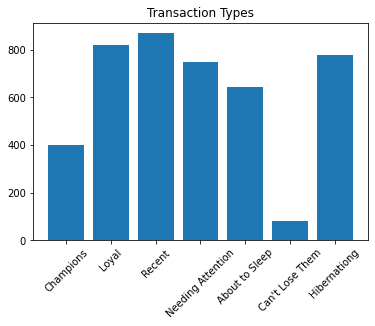

In [76]:

pltRFM = dfRFM.groupby('Label', as_index=False).aggregate({'CustomerID':'nunique'})

# setting the order for the plot, from top customers to low-value customers
labels_order = {l:i for i,l in enumerate(['Champions', 'Loyal', 'Recent', 'Needing Attention', 'About to Sleep', "Can't Lose Them", 'Hibernating'])}
pltRFM.sort_values(by="Label", key=lambda x:x.map(labels_order), inplace=True)

plt.bar(x=pltRFM['Label'], height=pltRFM["CustomerID"])
plt.title("Transaction Types") # Add a title to the axes.
plt.tick_params(axis='x', labelrotation=45)
